# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# displaying .png images
from IPython.display import Image

In [2]:
# turn on pretty printing
# %pprint

## 1. Consider the undirected network defined by the following set of links:

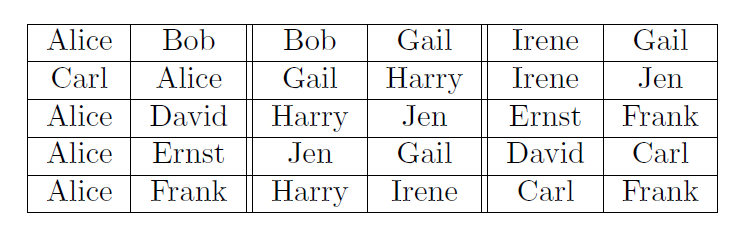

In [3]:
Image('data/network.png')

In [4]:
# creating network instance using networkx module
network_df = pd.read_csv('data/network.csv')

network = nx.Graph()

# filing the network
network.add_edges_from(network_df.values)

### (a) Draw the network by hand.

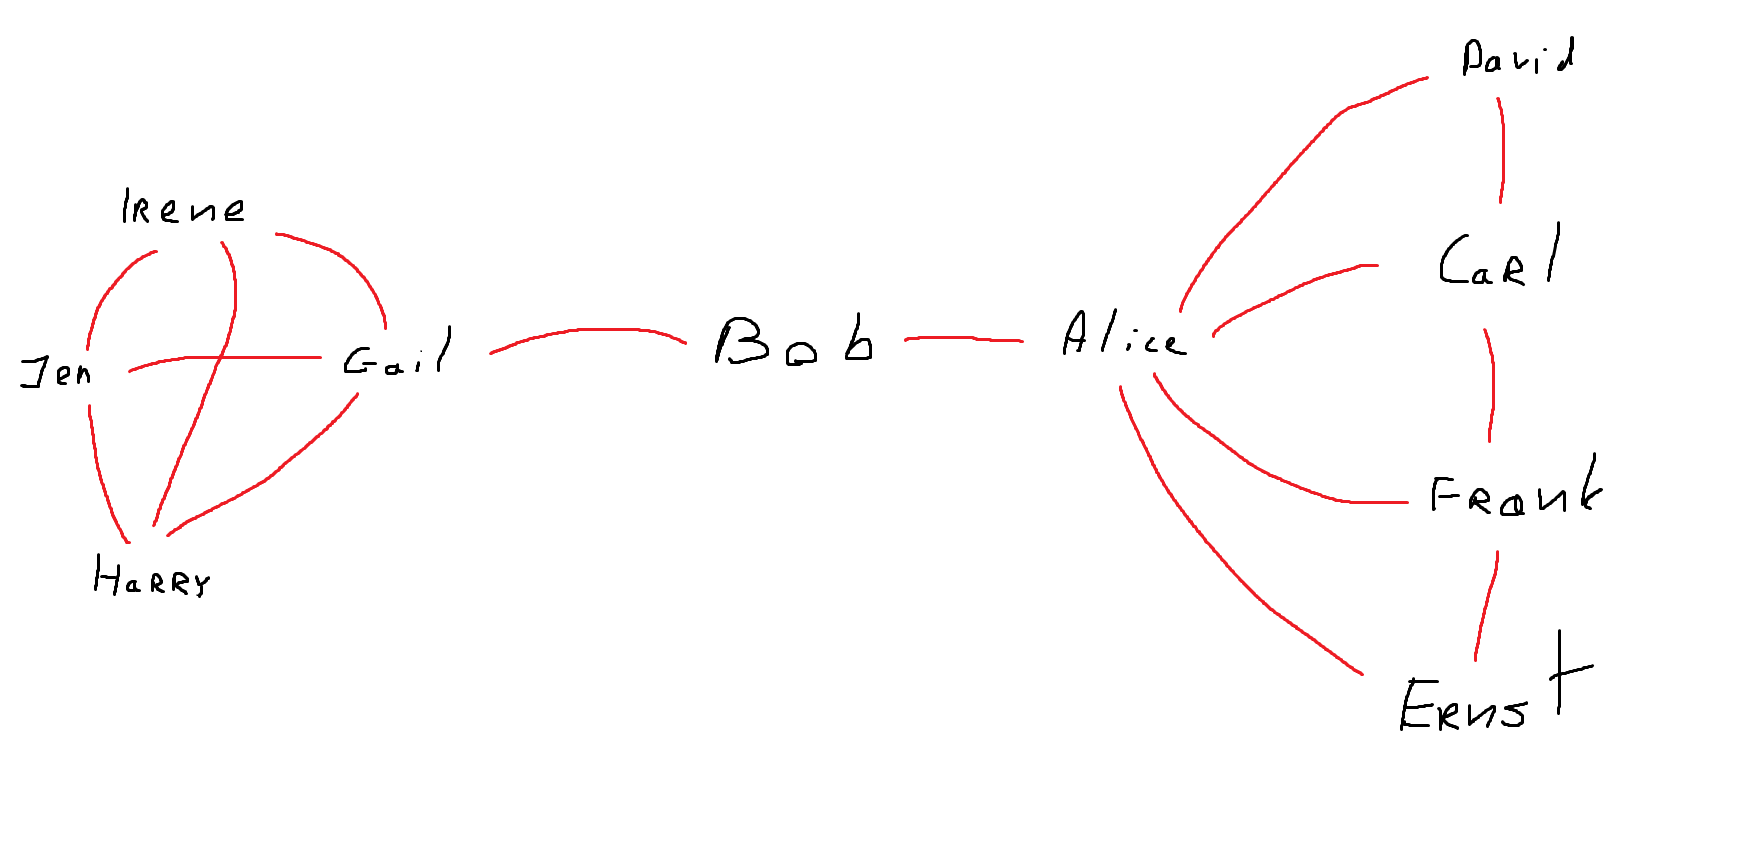

In [5]:
Image('data/network_by_hand.png')

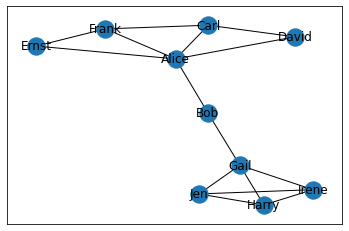

In [6]:
# using Python
nx.draw_networkx(network)

### (b) How many nodes are there?

answer: _10_

In [7]:
# using Python
len(network)

10

### (c) What is the density of the network?

\'# $k$' stands for 'number of $k$'

$\text{density} = \frac{\text{# actual connections}}{\text{# potential connections}} = \frac{15}{\frac{10 * 9}{2}} = \frac{15}{45} = \frac{1}{3}$

In [8]:
# using Python
nx.density(network)

0.3333333333333333

### (d) Calculate the degree of each node. Who is the most central node according to this measure?

In [9]:
nx.degree(network)

DegreeView({'Alice': 5, 'Bob': 2, 'Carl': 3, 'David': 2, 'Ernst': 2, 'Frank': 3, 'Gail': 4, 'Harry': 3, 'Jen': 3, 'Irene': 3})

### (e) Calculate the clustering of each node and the average clustering of the network.

Clusterring coefficient of a node: $C_i = \frac{2 L_i}{k_i (k_i-1)}$

where

$k_i$ - degree of node $i$.

$L_i$ - number of edges between the neighbours of node $i$.
    
ex. Carl has $k_i = 3$ neighbours with $L_i = 2$ connections between them.

$C_i = \frac{2 L_i}{k_i (k_i-1)} = \frac{2 \cdot 2}{3 \cdot 2} = \frac{2}{3}$


In [10]:
# clastering
clustering_dict = nx.clustering(network)
clustering_dict

{'Alice': 0.3,
 'Bob': 0,
 'Carl': 0.6666666666666666,
 'David': 1.0,
 'Ernst': 1.0,
 'Frank': 0.6666666666666666,
 'Gail': 0.5,
 'Harry': 1.0,
 'Jen': 1.0,
 'Irene': 1.0}

In [11]:
# avg clastering 

np.mean(list(clustering_dict.values()))

0.7133333333333333

### (f) Calculate the closeness centrality for each node. Who is the most central node according to this measure?

the formula:

$C(x) = \frac{n - 1}{\sum_{y \neq x} d(x, y)}$

where 

$n$ is the number of nodes in the network.

$d(x, y)$ is the shortest distance between x and y

ex. Carl

$C(Carl) = 9 / \left( d(Carl,Alice) + d(Carl,Bob) + \dots \right) = 9 / \left( 1 + 2 + 1 + 2 + 1 + 3 + 4 + 4 + 4 \right) = \frac{9}{22}$

In [12]:
#  ofc it's easier in Python
nx.closeness_centrality(network)

{'Alice': 0.5625,
 'Bob': 0.5625,
 'Carl': 0.4090909090909091,
 'David': 0.391304347826087,
 'Ernst': 0.391304347826087,
 'Frank': 0.4090909090909091,
 'Gail': 0.5,
 'Harry': 0.375,
 'Jen': 0.375,
 'Irene': 0.375}

Bob and Alice are both the most central nodes

### (g) Calculate the betweenness centrality of each node. Who is the most central node according to this measure?

the formula (from prof. Szawbiński lecture):

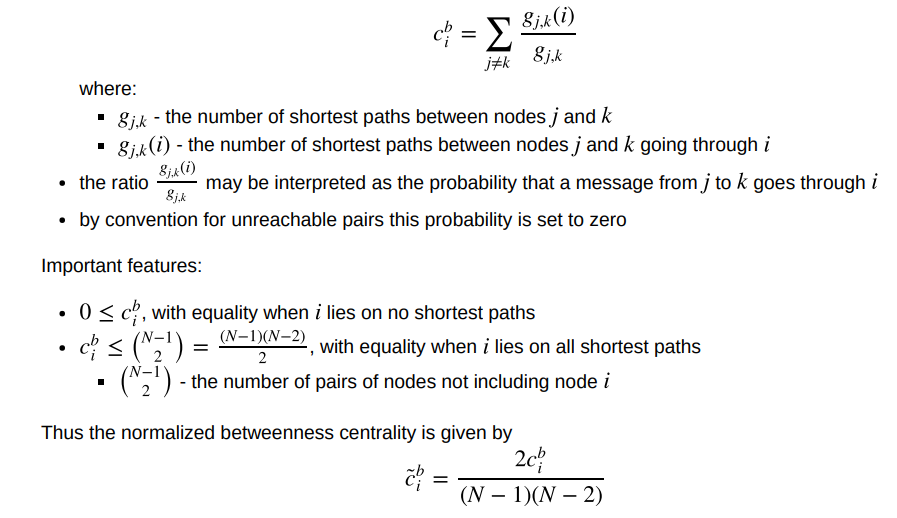

In [13]:
Image('data/betweenness_centrality.png')

In [14]:
nx.betweenness_centrality(network)

{'Alice': 0.611111111111111,
 'Bob': 0.5555555555555556,
 'Carl': 0.013888888888888888,
 'David': 0.0,
 'Ernst': 0.0,
 'Frank': 0.013888888888888888,
 'Gail': 0.5,
 'Harry': 0.0,
 'Jen': 0.0,
 'Irene': 0.0}

Alice is the most central node

# exercise 2